<a href="https://colab.research.google.com/github/Farzins-Lab/Data-Mining-and-Analytics-Final-Project/blob/main/Final_Version_Without_PCA_Final_Clustering_Implementations_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up Environment

In [ ]:
from sklearn import datasets

In [ ]:
! pip install -q kaggle

In [ ]:
 !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import files
files.upload()

Saving kagglee.json to kagglee.json


{'kagglee.json': b'{"username":"datasetaccess","key":"4d7f1044b1405cc85fca95d632b72ca7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/kagglee.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other


In [ ]:
#If you need to unzip using kaggle - change collab file name to avoid prompt
! unzip 'walmart-sales-dataset.zip'


Archive:  walmart-sales-dataset.zip
  inflating: walmart.csv             


In [ ]:
import pandas as pd


file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

In [ ]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

# PCA and K Means

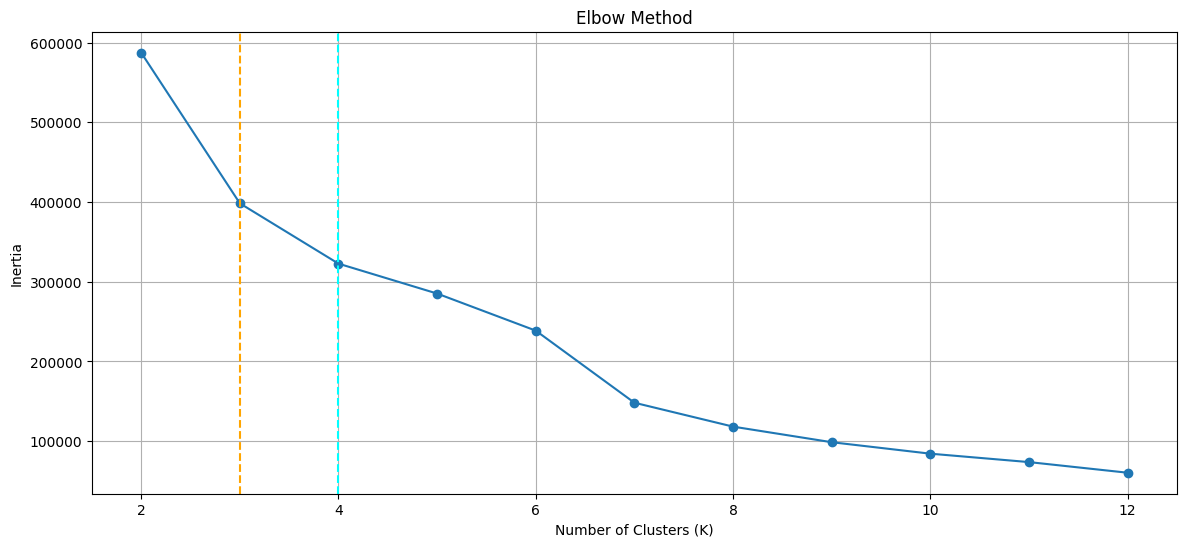

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt


#Scale Data
Vars = df[['ReceiptSum', 'ProductCategory']]
# One-Hot Encode
Hotvars = pd.concat([Vars[['ReceiptSum']], pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory') ], axis=1)

scaler = StandardScaler()
scaledData= scaler.fit_transform(Hotvars)
dataframeScaled = pd.DataFrame(scaledData, index = df.index, columns = ('ReceiptSum', 'ProductCategory'))

# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)

# Elbow Method
maxK = 12
inertia = []
k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(pcaData)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia, marker='o')
plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
minidf = df.sample(frac = .01, random_state =42 )

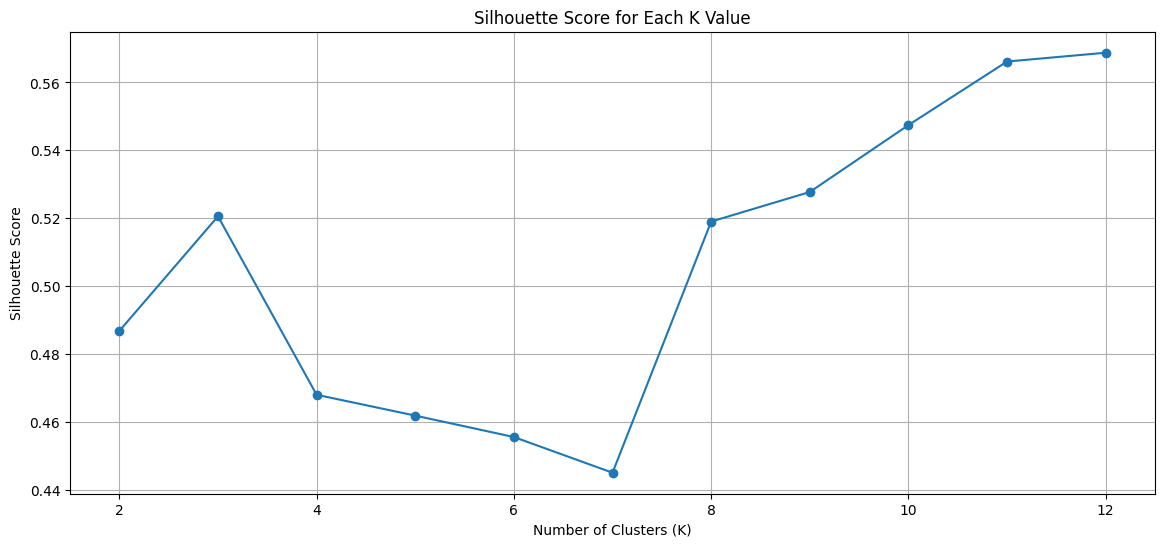

In [ ]:
#Lets check the Silhouette Score  the degree to which you have a shadow - lower shadow is worse

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
#Scale Data
Vars = minidf[['ReceiptSum', 'ProductCategory']]


# One-Hot Encode
Hotvars = pd.concat([Vars[['ReceiptSum']], pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory') ], axis=1)

scaler = StandardScaler()
scaledData= scaler.fit_transform(Hotvars)


# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)


# Elbow Method
maxK = 12
inertia = []
silhouettelist = []

k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=200)

    clusterlabel= kmeans.fit_predict(pcaData)

    silhouettescore = silhouette_score(pcaData, clusterlabel)
    silhouettelist.append(silhouettescore)

    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, silhouettelist, marker='o')
#plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
#plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Silhouette Score for Each K Value")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


## KMeans with Elbow Method Result

In [ ]:
# Run Kmeans K = 3

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_assignments_k3 = kmeans.fit_predict(pcaData)


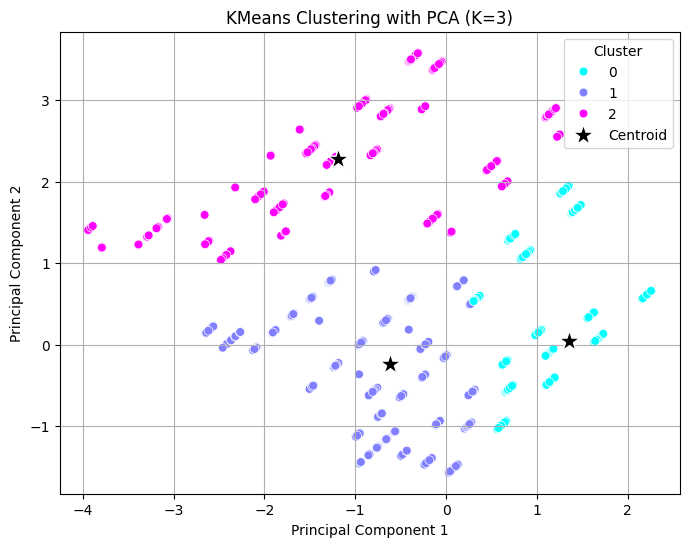

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k3  # Add the cluster labels as a new column
k3centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='cool', s=40 )

plt.scatter(  k3centroids[:, 0],k3centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',
    zorder=2
)

plt.title("KMeans Clustering with PCA (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


In [ ]:
# Run Kmeans K = 4


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_assignments_k4 = kmeans.fit_predict(pcaData)

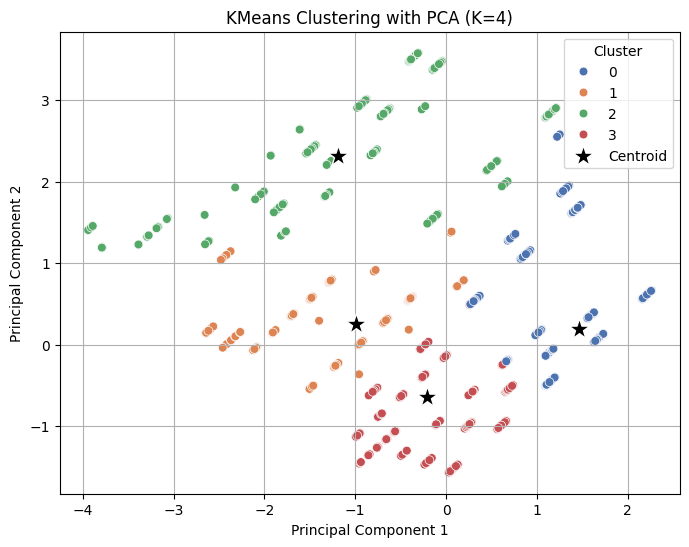

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k4  # Add the cluster labels as a new column
k4centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='deep', s=40 )

plt.scatter(  k4centroids[:, 0],k4centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


## Kmeans with Silhouette Score

In [ ]:
# Run Kmeans K = 3 with Silhouette Score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_assignments_k3 = kmeans.fit_predict(pcaData)


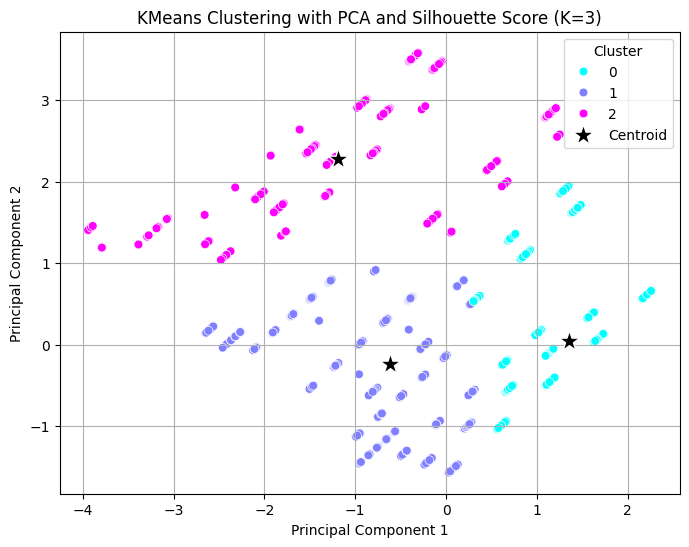

In [ ]:
# Kmeans with Silhouette Score K=3

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

k3silhouette = silhouettelist[k_values.index(3)]

pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k3  # Add the cluster labels as a new column
k3centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='cool', s=40 )

plt.scatter(  k3centroids[:, 0],k3centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA and Silhouette Score (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()

In [ ]:
# Run Kmeans K = 8 with Silhouette Score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
cluster_assignments_k8 = kmeans.fit_predict(pcaData)


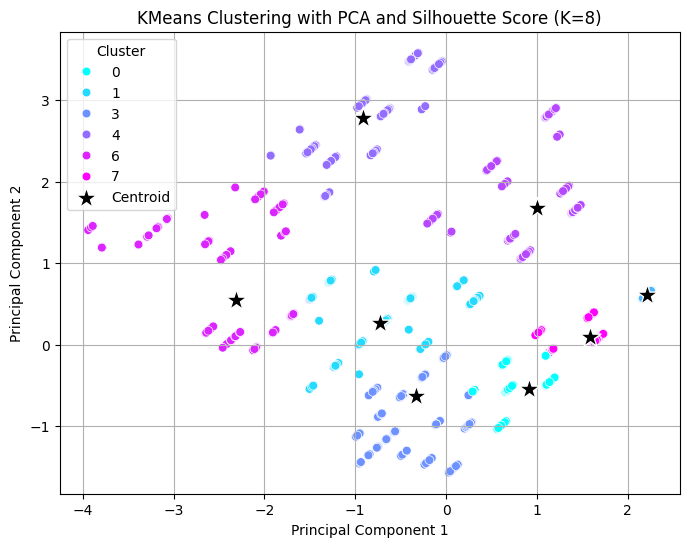

In [ ]:
# Kmeans with Silhouette Score

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

k8silhouette = silhouettelist[k_values.index(8)]

pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k8  #pick right number of clusters
k8centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='cool', s=40 )

plt.scatter(  k8centroids[:, 0],k8centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA and Silhouette Score (K=8)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()

In [ ]:
# Run Kmecluster_assignments_k10ans K = 10 with Silhouette Score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
cluster_assignments_k10 = kmeans.fit_predict(pcaData)


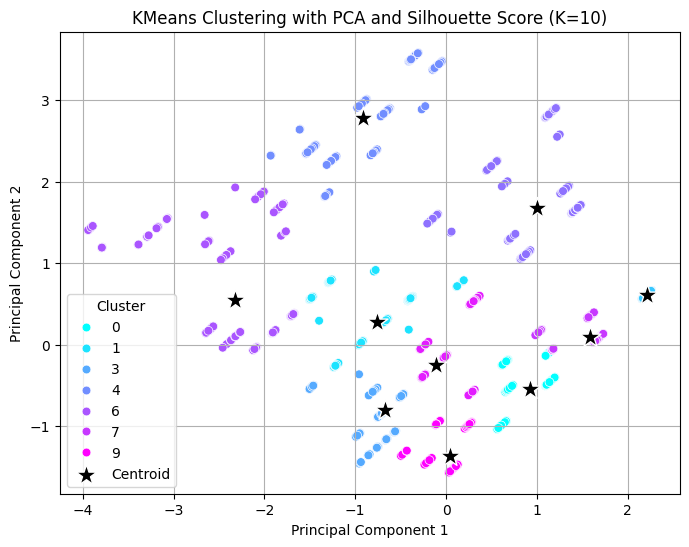

In [ ]:
# Kmeans with Silhouette Score

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

k10silhouette = silhouettelist[k_values.index(10)]

pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k10  #pick right number of clusters
k10centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='cool', s=40 )

plt.scatter(  k10centroids[:, 0],k10centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA and Silhouette Score (K=10)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()

### why only 7 clusters in legend

# DB Scan V2

In [ ]:
import pandas as pd
file = ('/content/walmart.csv')

df = pd.read_csv(file)


df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt



#### Prepare Data

# Feature Selection
Vars = df[['ReceiptSum', 'ProductCategory']]

# One-Hot Encode
Hotvars = pd.concat([Vars[['ReceiptSum']], pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory') ], axis=1)

# Scale and Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(Hotvars)


# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)



# check shape
print("PCA-transformed data shape:", pcaData.shape)



PCA-transformed data shape: (550068, 2)


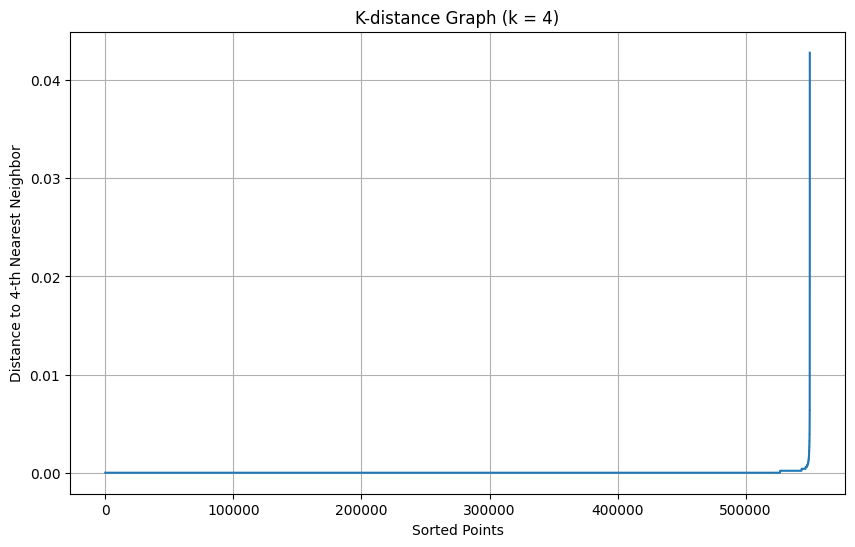

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np




#### K-NN To Try and find best eps

# Set k equal to the min_samples
k = 4  # typical starting point for DBSCAN (min samples = 2 * numfeatures)
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(pcaData)

# Get distances to the k-th nearest neighbor for each point
distances, indices = neighbors_fit.kneighbors(pcaData)

# Sort the k-distances
sorted_distances = np.sort(distances[:, k - 1])

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title(f"K-distance Graph (k = {k})")
plt.xlabel("Sorted Points")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.grid(True)
plt.show()


## Fine Tuning for eps and min_pts

In [ ]:
import numpy as np
# Return the percentage of transactions that were assigned to a cluster (not labeled as noise)
# `cluster_labels` is the output of DBSCAN (list of cluster assignments)
def percentClustered(assignedClusters):
    Alltransactions = len(assignedClusters)
    clusteredTransactions = Alltransactions - list(assignedClusters).count(-1)
    return (clusteredTransactions / Alltransactions) * 100



# Return the number of unique clusters (excluding noise)
# `cluster_labels` is the output of DBSCAN
def clusterCount(uniqueClusters):
    clusterids = set(uniqueClusters)
    if -1 in clusterids:
        clusterids.remove(-1)  # Remove noise
    totaldistinctclusters = len(clusterids)
    return totaldistinctclusters

In [ ]:
##
# Use 25% of the data just for tuning
from sklearn.utils import resample
pcaSample = resample(pcaData, n_samples=int(0.01 * len(pcaData)), random_state=42)



In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [3, 4, 5, 6]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaSample)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaSample[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore

        del db, assignedClusters

# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 98.20%
Number of transaction clusters found: 63


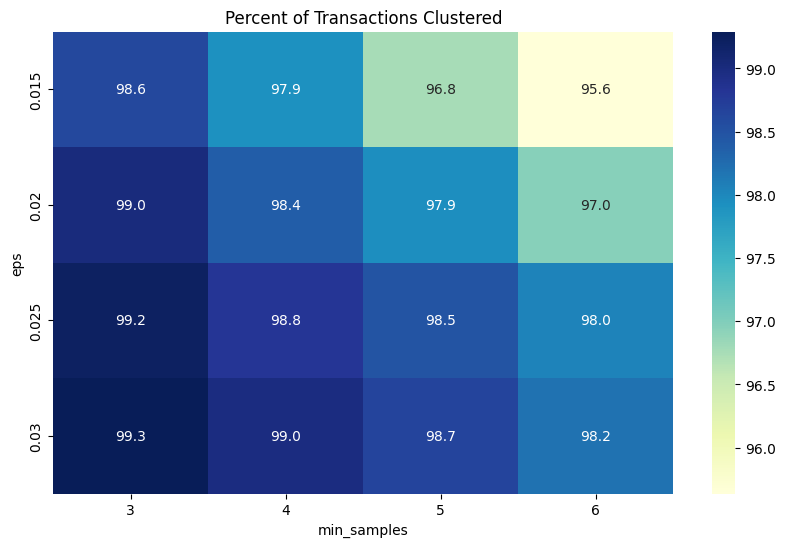

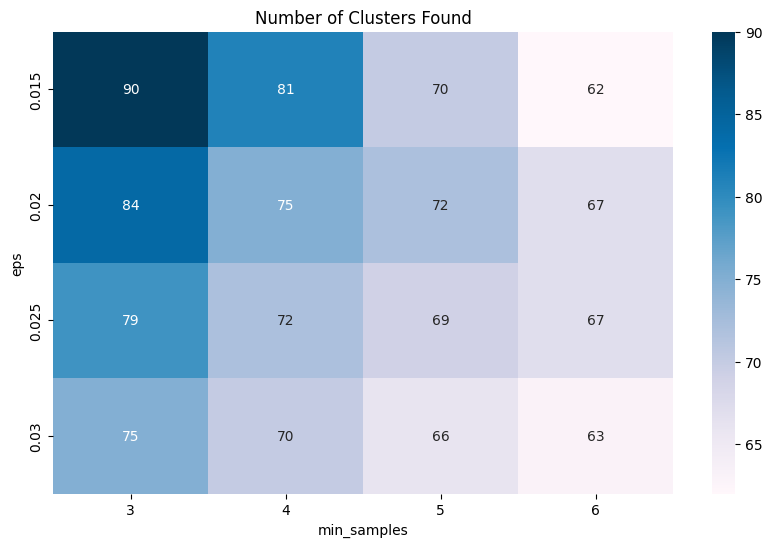

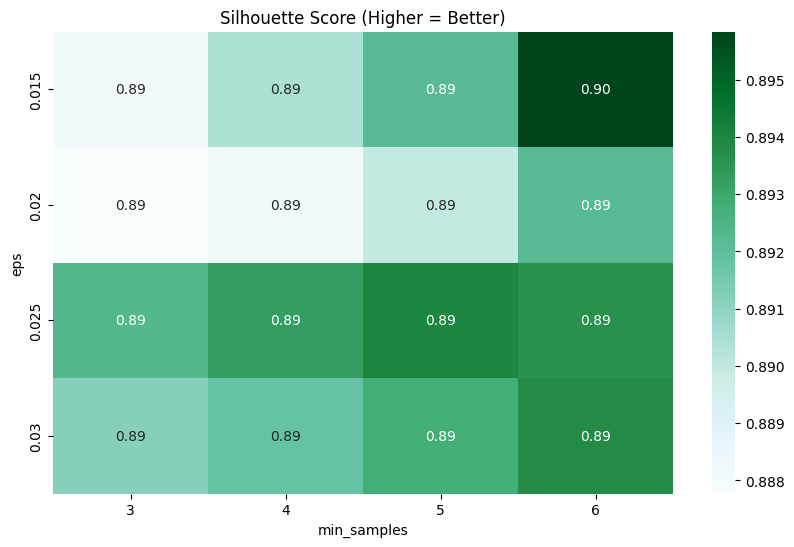

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score (Higher = Better)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()



In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.008, 0.009, 0.010, 0.011, 0.012,0.013, 0.014, 0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaSample)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaSample[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore

        del db, assignedClusters

# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 91.96%
Number of transaction clusters found: 37


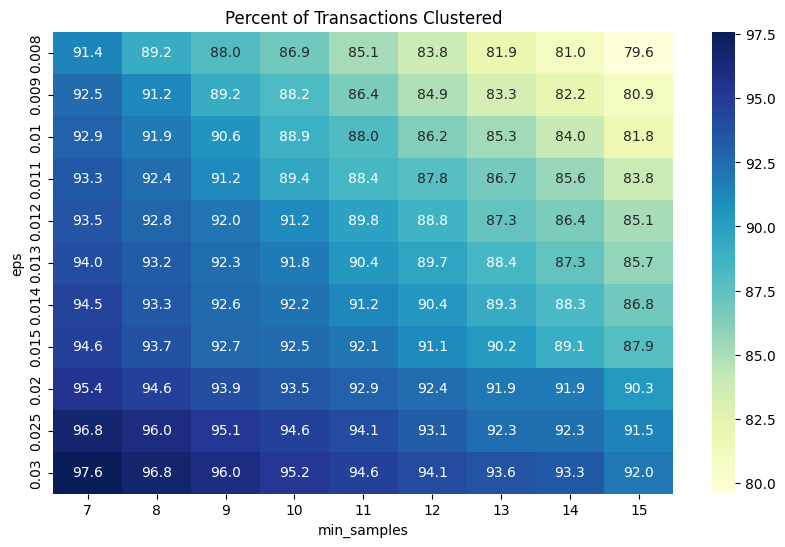

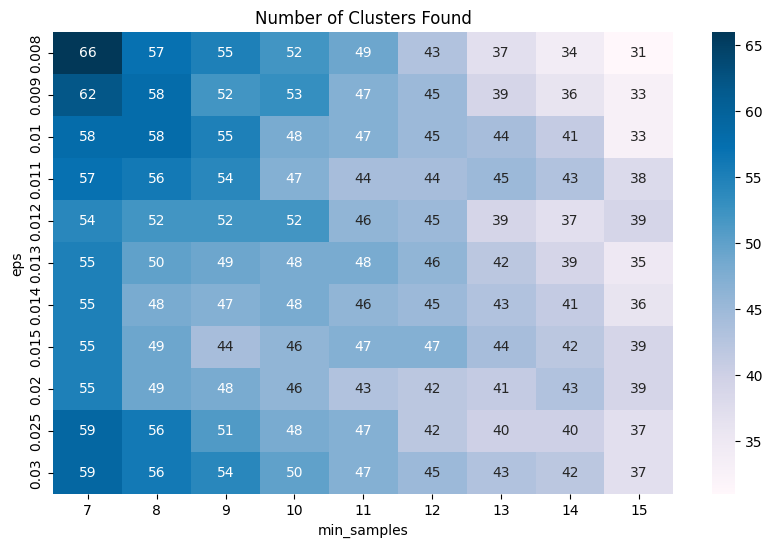

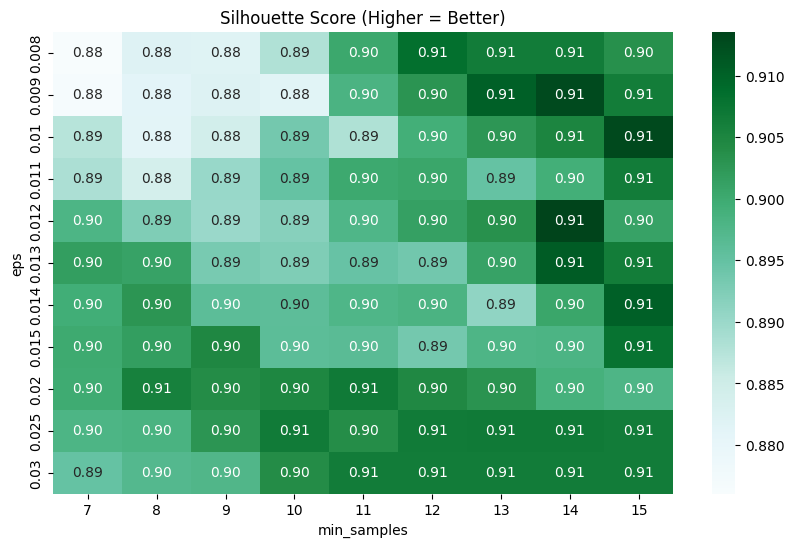

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score (Higher = Better)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()


## Keep searching for lower number of clusters

In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.008, 0.009, 0.010, 0.011, 0.012,0.013, 0.014, 0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaSample)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaSample[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore

        del db, assignedClusters

# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 87.75%
Number of transaction clusters found: 31


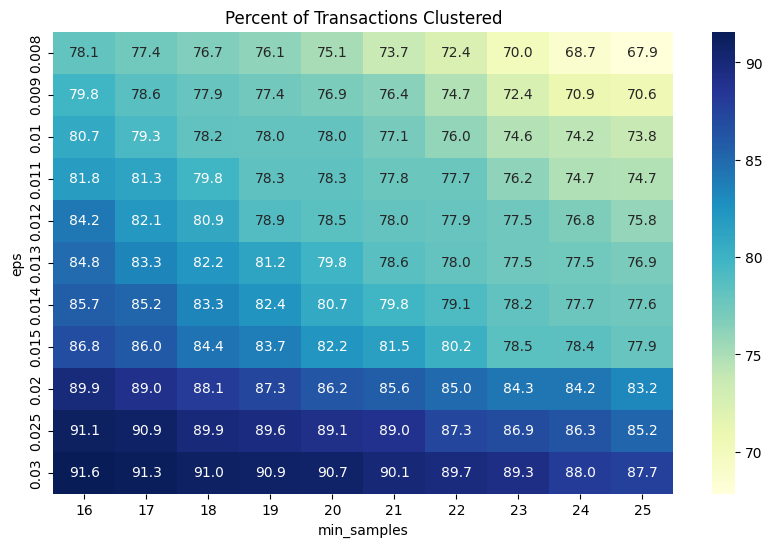

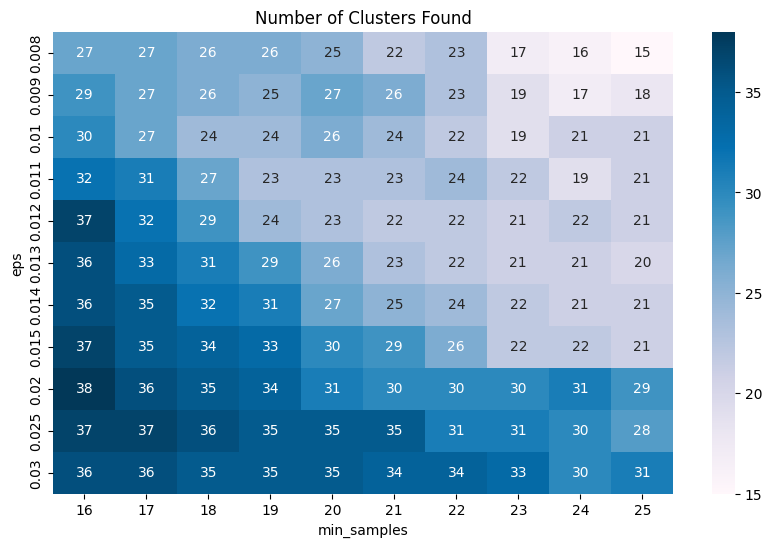

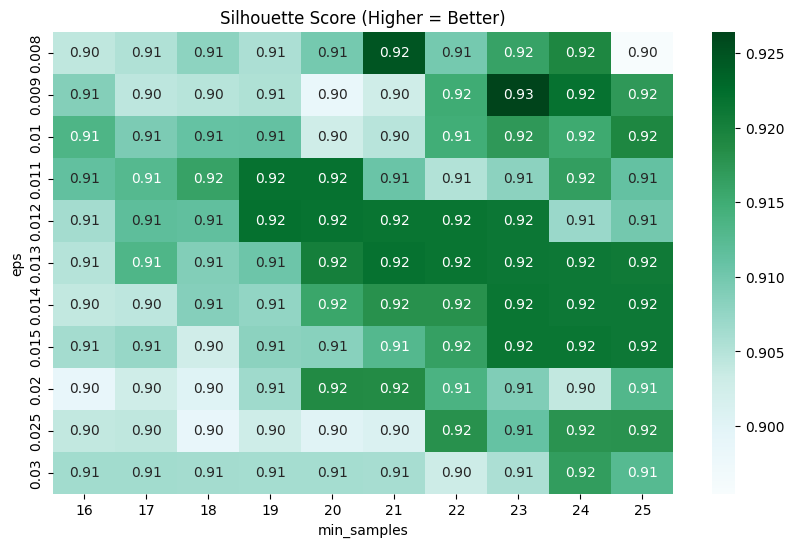

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score (Higher = Better)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Set the params
eps = 0.015
min_samples = 15

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaSample)


In [ ]:
# Display the results


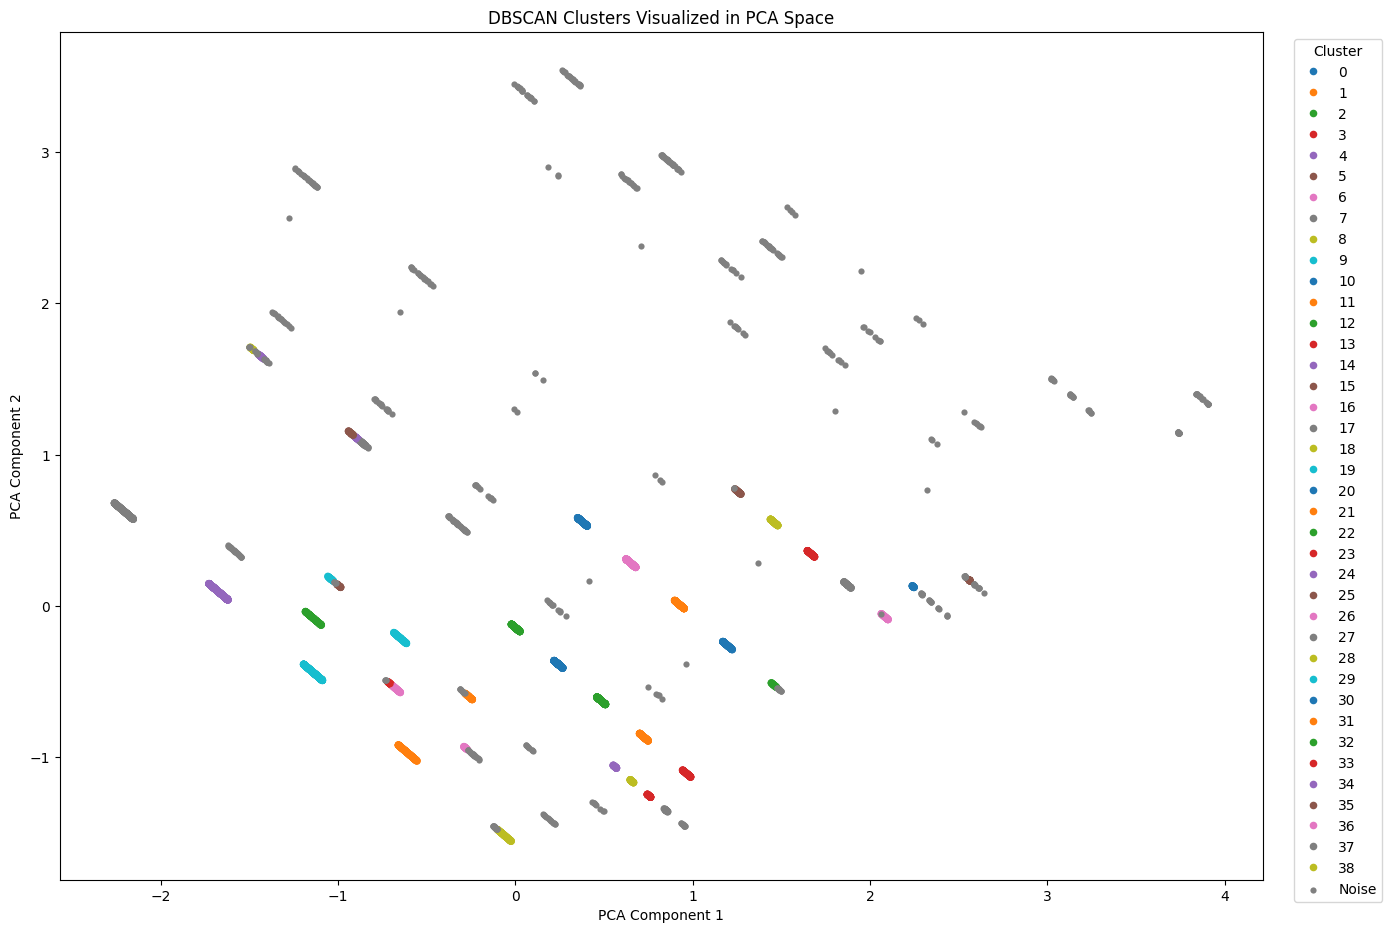

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaSample[:, 0]
Y = pcaSample[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [.1, .2, 0.3, .4, .5, .6, .7, .8]         # y-axis (rows)
min_samples_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaSample)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaSample[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore

        del db, assignedClusters

# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 100.00%
Number of transaction clusters found: 1


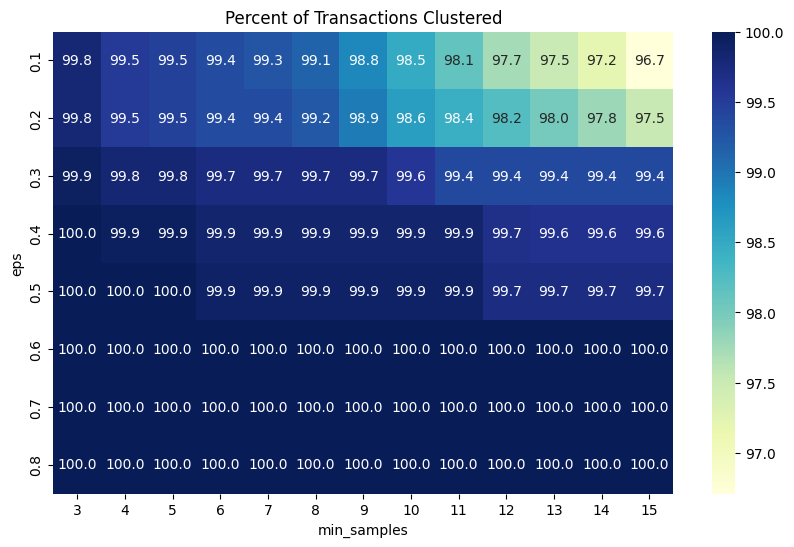

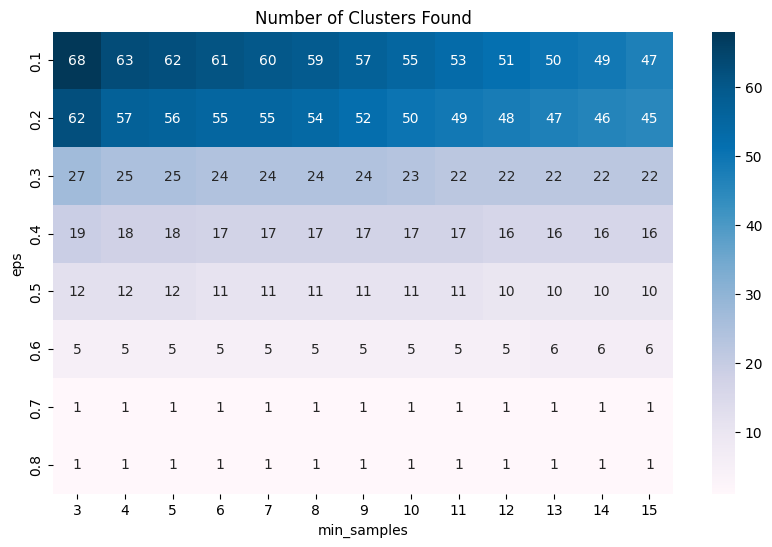

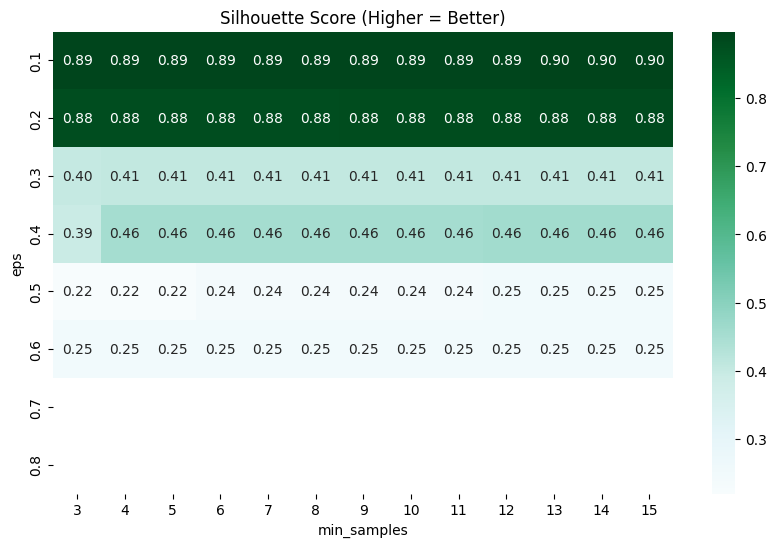

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [ .1, .2, 0.3, .4, .5, .6, .7, .8]
min_samples_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score (Higher = Better)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()


# Final DB Scan

In [ ]:
from sklearn.cluster import DBSCAN

# Set the params
eps = 0.008
min_samples = 14

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaSample)


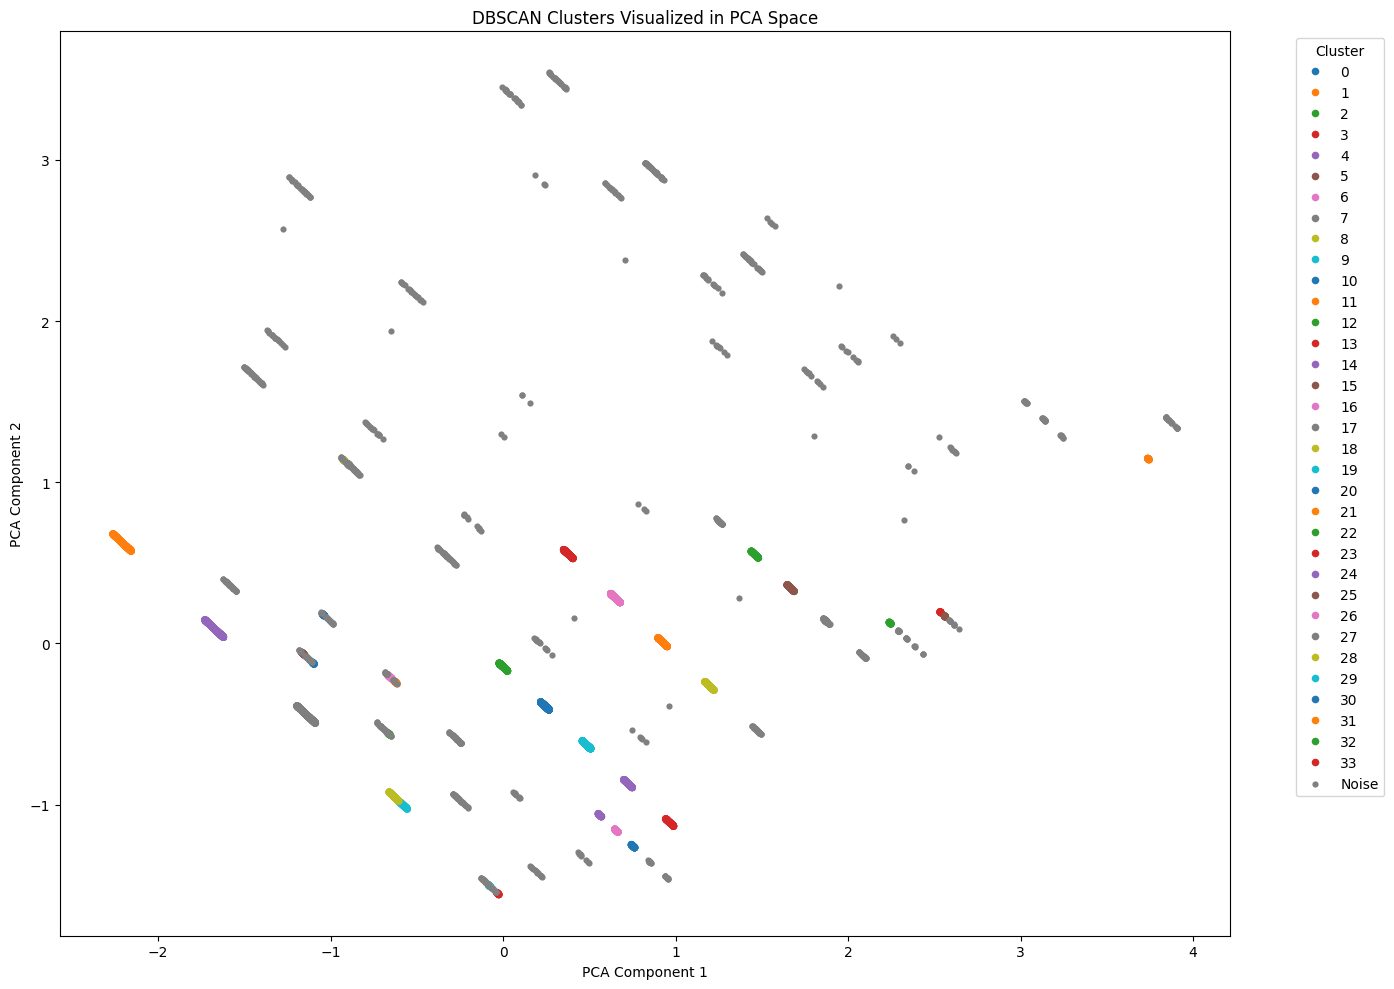

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaSample[:, 0]
Y = pcaSample[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#HDBScan


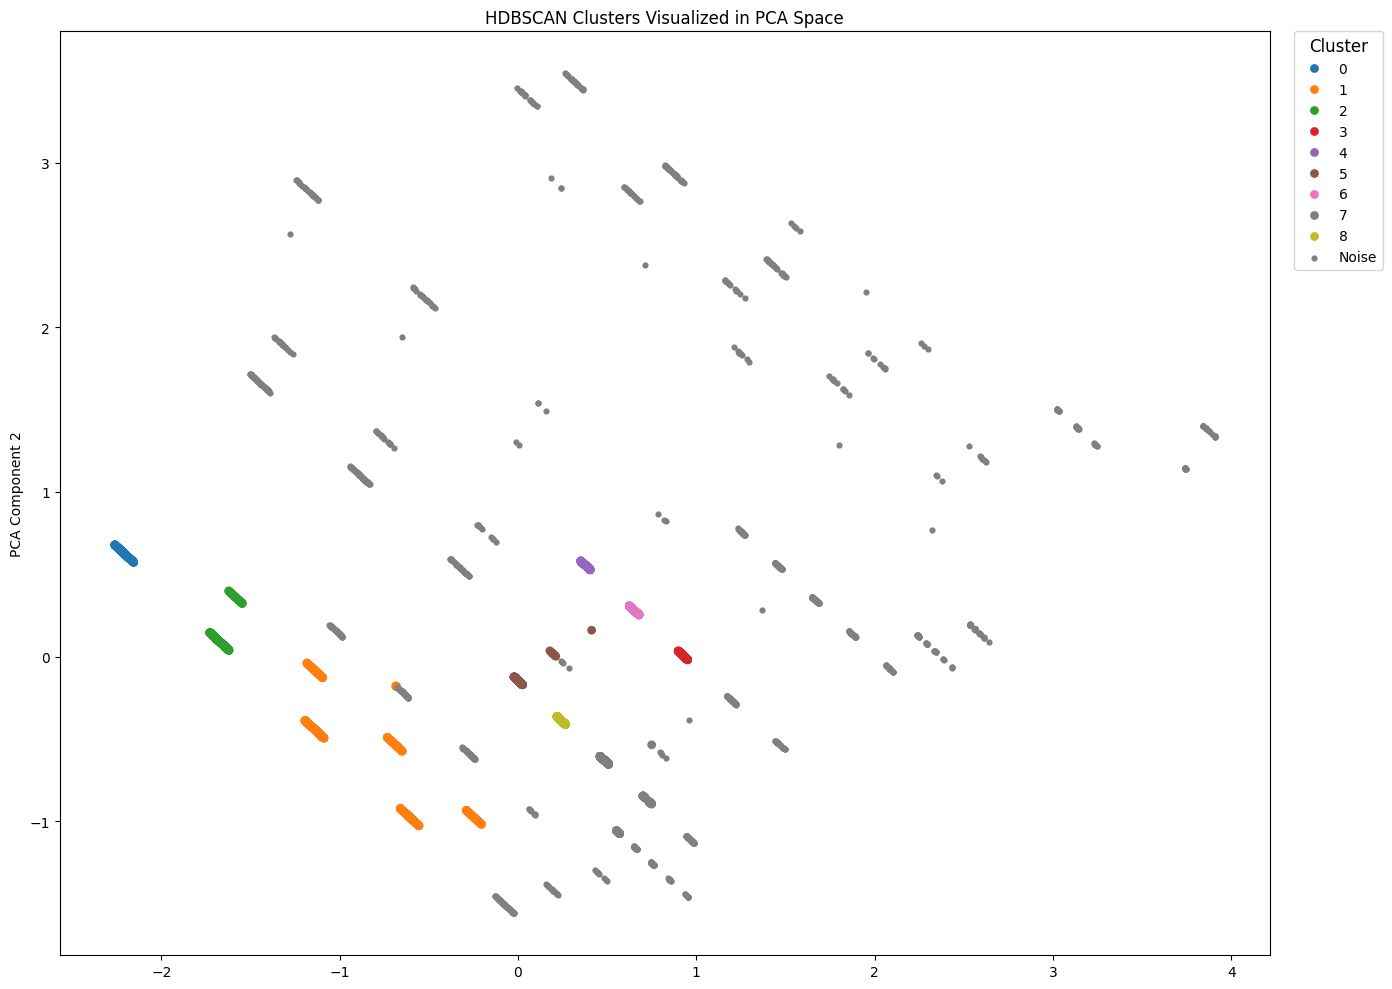

In [ ]:
X = pcaSample[:, 0]
Y = pcaSample[:, 1]
cluster_ids = assignedClusters

core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))  #
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=40, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("HDBSCAN Clusters Visualized in PCA Space")
plt.ylabel("PCA Component 2")

plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

percent_clustered = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
num_clusters = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
silhouette_scores = np.zeros((len(minpointpercluster), len(noisethresholdabove)))

# Loop through each eps and min_samples combination

for i, min_cluster_size in enumerate(minpointpercluster):
    for j, min_pts in enumerate(noisethresholdabove):
        db = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaSample)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

  # Also calculate Silh score for each implementation of DB Scan
        if numberOfClusters > 1:
            silScore = silhouette_score(pcaSample[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


print("Percent  clustered: {:.2f}%".format(percentageClustered))
print("Number of clusters found: {}".format(numberOfClusters))

Percent  clustered: 71.02%
Number of clusters found: 9


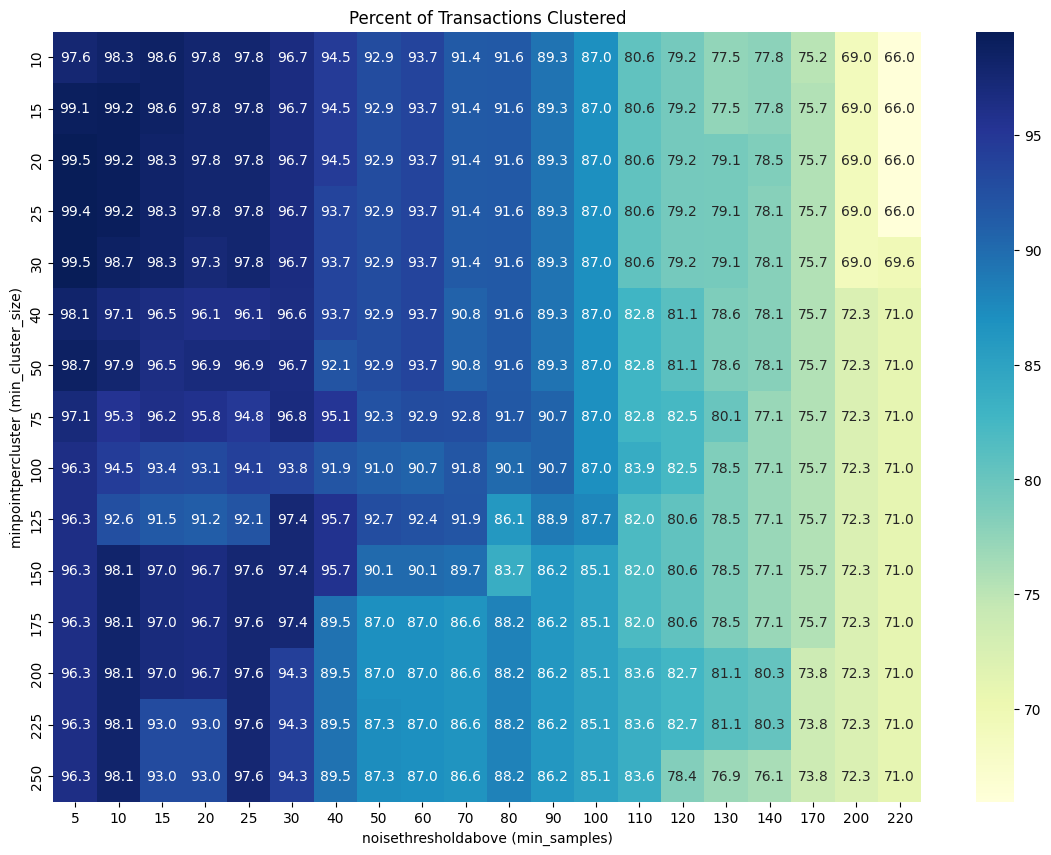

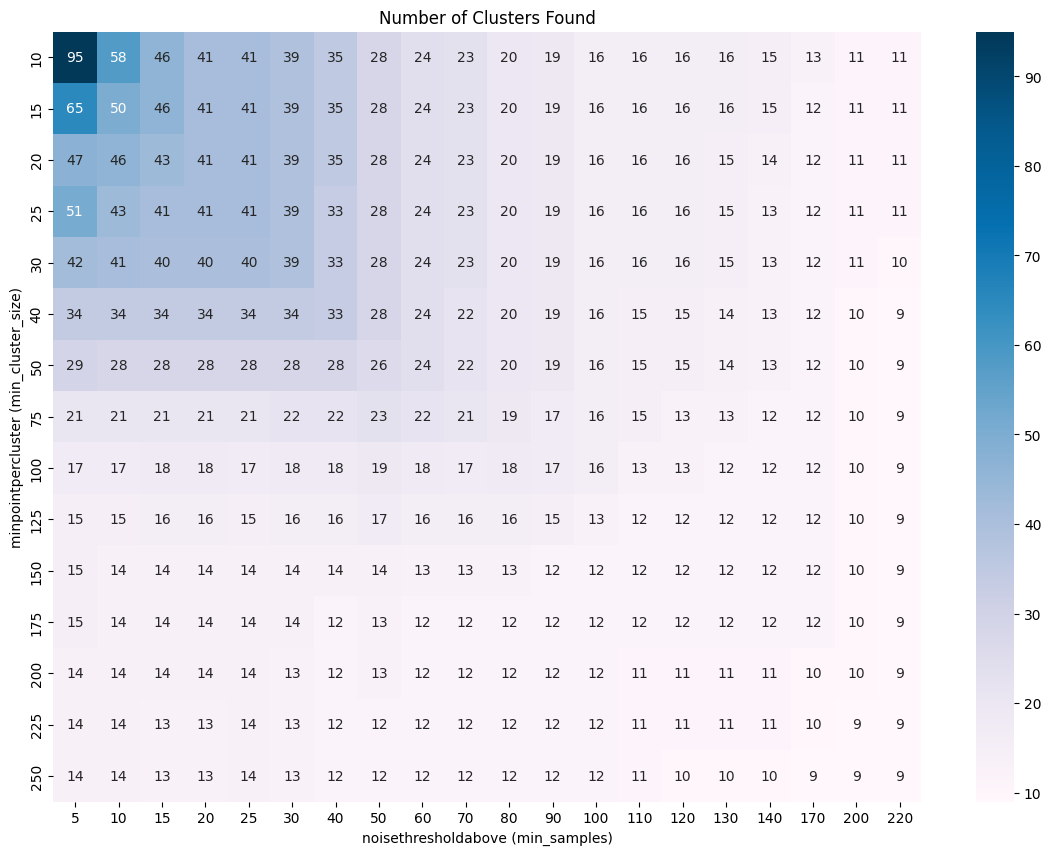

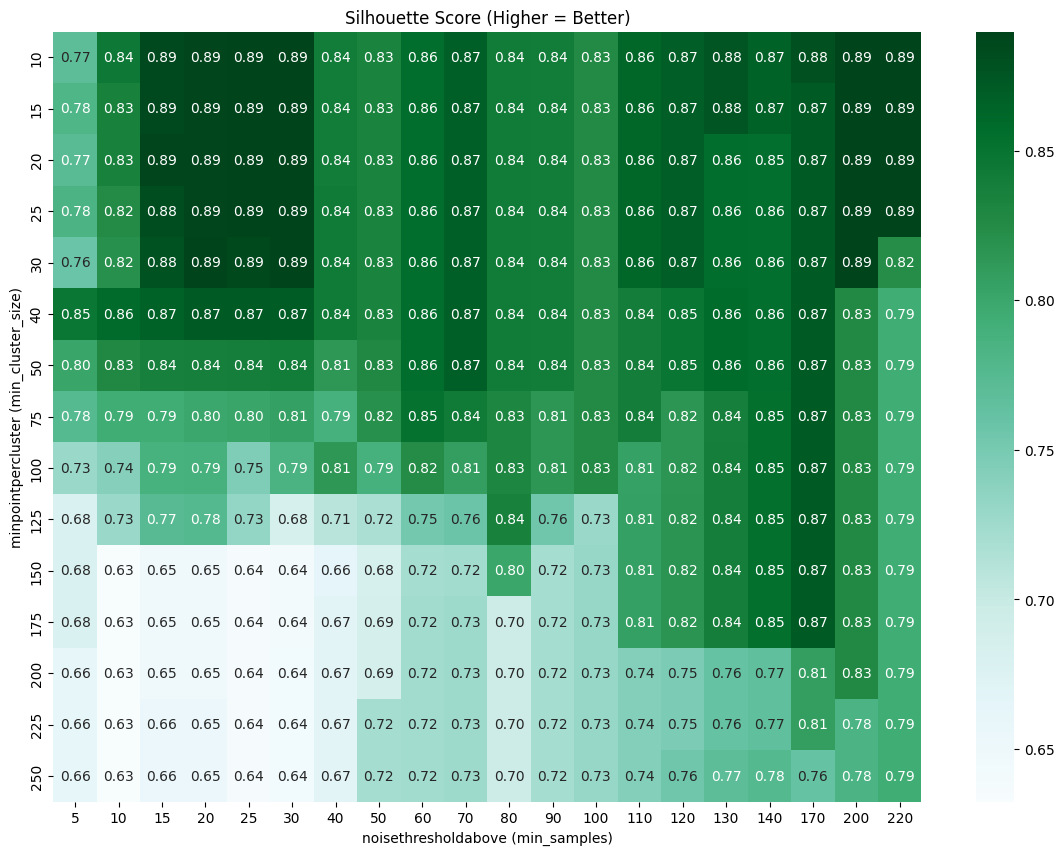

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

# Percent heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(percent_clustered, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("noisethresholdabove (min_samples)")
plt.ylabel("minpointpercluster (min_cluster_size)")
plt.show()

# Number clusters heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(num_clusters, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("noisethresholdabove (min_samples)")
plt.ylabel("minpointpercluster (min_cluster_size)")
plt.show()

# Silhouette scores
plt.figure(figsize=(14, 10))
sns.heatmap(silhouette_scores, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score (Higher = Better)")
plt.xlabel("noisethresholdabove (min_samples)")
plt.ylabel("minpointpercluster (min_cluster_size)")
plt.show()

In [ ]:
from sklearn.cluster import HDBSCAN

# Set the params
eps = 0.008
min_samples = 14

#  HDBSCAN
hdb = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaSample)


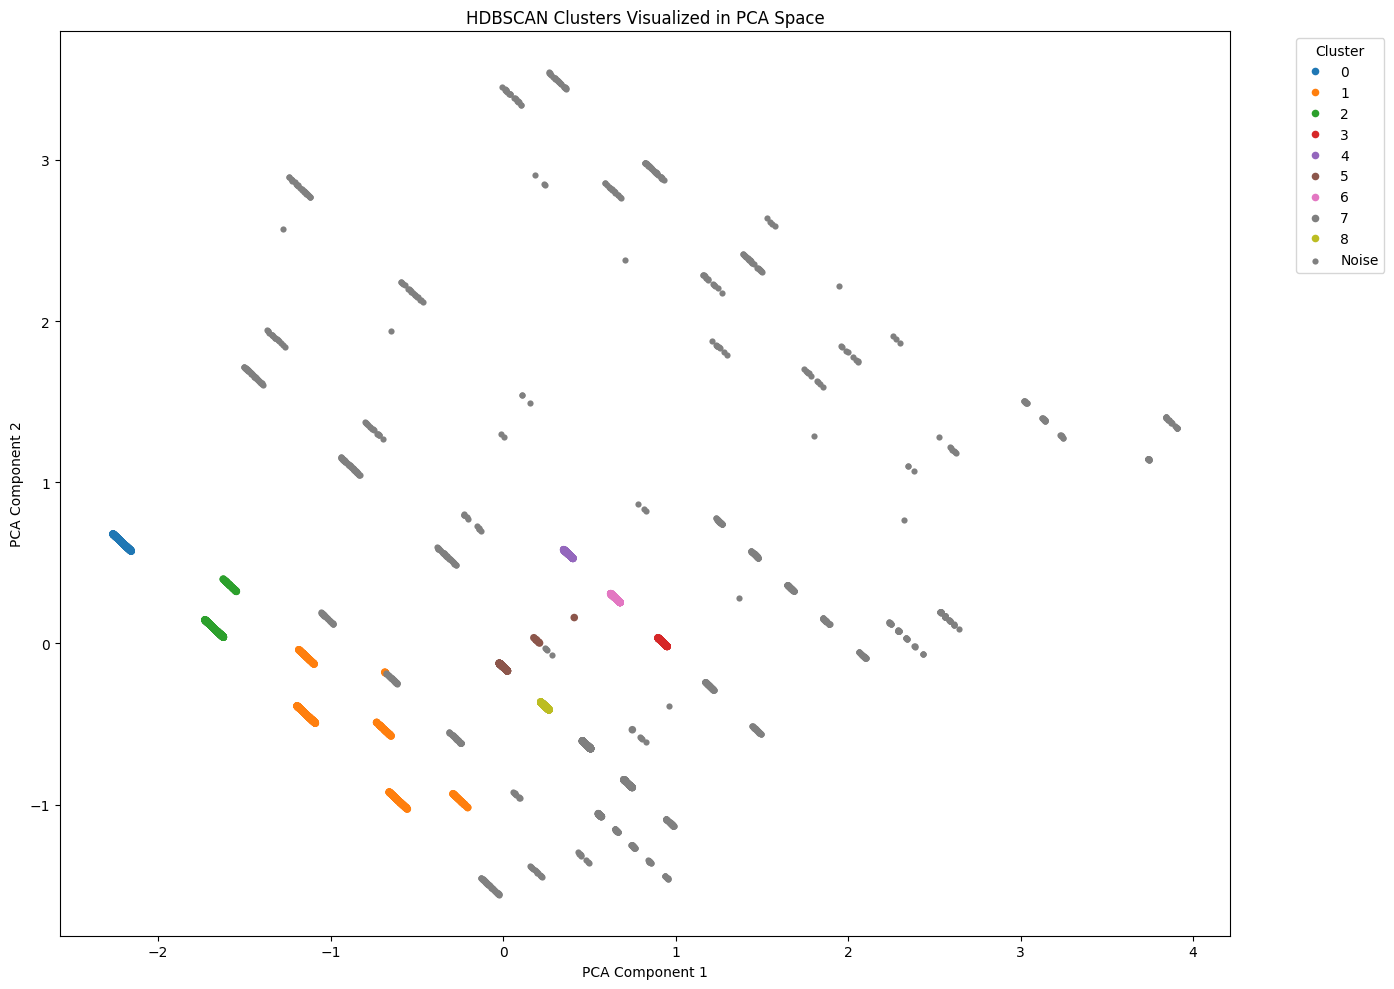

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaSample[:, 0]
Y = pcaSample[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("HDBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
